# CDD - Lab2 e Lab3

EDA, Histogramas, Sumarização, Correlação.

Interatividade.

## Instruções

Individual, em dupla ou em grupos de 3 alunos.

Quando for feito por mais de um aluno:

*   Todos enviam uma cópia idêntica; OU
*   Um aluno envia uma cópia completa e os demais enviam uma cópia vazia, indicando apenas o grupo e onde está a solução (informe isso na próxima célula).

**Implementações Extras.**
Implemente apenas o que é pedido (a quantidade de gráficos, por exemplo). Caso queria implementar algo mais, deixe separado no final do notebook (existe uma seção de rascunho já criada para isso).





## Dataset

Dados do Controle Acadêmico UFCG

### Descrição das Colunas

https://docs.google.com/document/d/1jLYjA8rZR3Yt9PRXGG0lFAHg74-spCZQ/edit?usp=drive_link

## Importações e complementos

In [ ]:
!pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import gdown
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import plot, iplot
import cufflinks as cf
import plotly.express as px

cf.go_offline()
plotly.offline.init_notebook_mode(connected=True)

import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

## Carregar o dataset

In [ ]:
# ID do arquivo no Google Drive
file_id = '1-4b8IRYIAVhf8G-5qjNtrpNe-Mhi0NQD'

# URL para download do arquivo
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Baixar o arquivo usando gdown
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

# Carregar o dataset no pandas
df = pd.read_csv(output)

pd.set_option('display.max_colwidth', None)  # Mostrar todo o conteúdo das células
pd.set_option('display.max_columns', None)   # Mostrar todas as colunas do DataFrame
pd.set_option('display.width', None)         # Ajustar a largura do display

# Exibir as primeiras linhas do dataframe
df.head()

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1-4b8IRYIAVhf8G-5qjNtrpNe-Mhi0NQD
From (redirected): https://drive.google.com/uc?export=download&id=1-4b8IRYIAVhf8G-5qjNtrpNe-Mhi0NQD&confirm=t&uuid=1ea9024c-3e01-4a30-9270-d33fedac5ab7
To: /content/dataset.csv
100%|██████████| 239M/239M [00:03<00:00, 61.2MB/s]


,registration,subjectCode,classYear,classPeriod,classId,status_x,type,finalAverage,courseCode,curriculumCode,campus,maritalStatus,gender,birthDate,status_y,inactivityReason,inactivityYear,inactivityPeriod,admissionType,admissionYear,admissionPeriod,nationality,countryOfBirth,race,secondarySchoolGraduationYear,secondarySchoolType,affirmativePolicy
0,119135939,1307196,2019,1,1.0,REPROVADO_POR_FALTA,NORMAL,NaN,13323110.0,2016.0,1.0,SOLTEIRO,FEMININO,38,INATIVO,CANCELADO_REPROVOU_TODAS_POR_FALTAS,2019.0,2.0,VESTIBULAR,2019.0,1.0,BRASILEIRA,PB,BRANCA,2004.0,SOMENTE_ESCOLA_PUBLICA,L1
1,119135939,1307351,2019,1,1.0,REPROVADO_POR_FALTA,NORMAL,NaN,13323110.0,2016.0,1.0,SOLTEIRO,FEMININO,38,INATIVO,CANCELADO_REPROVOU_TODAS_POR_FALTAS,2019.0,2.0,VESTIBULAR,2019.0,1.0,BRASILEIRA,PB,BRANCA,2004.0,SOMENTE_ESCOLA_PUBLICA,L1
2,119135939,1307352,2019,1,1.0,REPROVADO_POR_FALTA,NORMAL,NaN,13323110.0,2016.0,1.0,SOLTEIRO,FEMININO,38,INATIVO,CANCELADO_REPROVOU_TODAS_POR_FALTAS,2019.0,2.0,VESTIBULAR,2019.0,1.0,BRASILEIRA,PB,BRANCA,2004.0,SOMENTE_ESCOLA_PUBLICA,L1
3,119135939,1307353,2019,1,1.0,REPROVADO_POR_FALTA,NORMAL,NaN,13323110.0,2016.0,1.0,SOLTEIRO,FEMININO,38,INATIVO,CANCELADO_REPROVOU_TODAS_POR_FALTAS,2019.0,2.0,VESTIBULAR,2019.0,1.0,BRASILEIRA,PB,BRANCA,2004.0,SOMENTE_ESCOLA_PUBLICA,L1
4,119135939,1307369,2019,1,1.0,REPROVADO_POR_FALTA,NORMAL,NaN,13323110.0,2016.0,1.0,SOLTEIRO,FEMININO,38,INATIVO,CANCELADO_REPROVOU_TODAS_POR_FALTAS,2019.0,2.0,VESTIBULAR,2019.0,1.0,BRASILEIRA,PB,BRANCA,2004.0,SOMENTE_ESCOLA_PUBLICA,L1


## Inspeção Inicial dos Dados, Pré-processamento, limpeza, transformações, etc

Fique à vontade para criar descrições aninhadas aqui. Para ficarem aninhados, use títulos markdown de 3o nível (###) em diante.

### Inspeções, tratamentos no tipo de algumas colunas e análises simples

In [ ]:
#Verificando o tipo das colunas
df.dtypes

,0
registration,int64
subjectCode,int64
classYear,int64
classPeriod,int64
classId,float64
status_x,object
type,object
finalAverage,float64
courseCode,float64
curriculumCode,float64


### Exibindo os diferentes tipos de status juntamente com a suas respectivas contagens


In [ ]:
df_status = df['status_x'].value_counts().reset_index()
df_status = pd.DataFrame({'Status do Aluno': df_status['status_x'], 'Contagem':df_status['count']})
df_status

,Status do Aluno,Contagem
0,APROVADO,1001616
1,REPROVADO,77705
2,REPROVADO_POR_FALTA,67901
3,TRANCADO,25467
4,CANCELADO,16530
5,EM_CURSO,36


### Exibindo os diferentes tipos de raças juntamente com as suas respectivas contagens


In [ ]:
df_race = df.drop_duplicates(subset='registration')['race'].value_counts().reset_index()
df_race = pd.DataFrame({'Raça': df_race['race'],'Contagem':df_race['count']})
df_race

,Raça,Contagem
0,PARDA,14726
1,BRANCA,13727
2,PRETA,2331
3,AMARELA,1159
4,NAO_DECLARADA,542
5,INDIGENA,75


### Exibindo os estados civis possíveis com as suas respectivas contagens


In [ ]:
df_marital_status = df.drop_duplicates(subset='registration')['maritalStatus'].value_counts().reset_index()
df_marital_status = pd.DataFrame({'Estado Civil': df_marital_status['maritalStatus'], 'Contagem': df_marital_status['count']})
df_marital_status

,Estado Civil,Contagem
0,SOLTEIRO,30144
1,CASADO,2217
2,DIVORCIADO,182
3,VIUVO,12
4,SEPARADO_JUDICIALMENTE,5


### Exibindo os gêneros possíveis com as suas respectivas contagens

In [ ]:
df_gender = df.drop_duplicates(subset='registration')['gender'].value_counts().reset_index()
df_gender = pd.DataFrame({'Gênero': df_gender['gender'], 'Contagem': df_gender['count']})
df_gender

,Gênero,Contagem
0,MASCULINO,17032
1,FEMININO,15528


### Exibindo os diferentes motivos que levaram um aluno estar inativo

In [ ]:
df_inactive_reason = df.drop_duplicates(subset='registration')['inactivityReason'].value_counts().reset_index()
df_inactive_reason = pd.DataFrame({'Motivo da Inatividade': df_inactive_reason['inactivityReason'], 'Contagem': df_inactive_reason['count']})
df_inactive_reason

,Motivo da Inatividade,Contagem
0,GRADUADO,12778
1,CANCELAMENTO_POR_ABANDONO,6260
2,CANCELADO_REPROVOU_TODAS_POR_FALTAS,3865
3,CANCELAMENTO_P_SOLICITACAO_ALUNO,3756
4,CANCELADO_NOVO_INGRESSO_MESMO_CURSO,2023
5,CANCELADO_3_REPROV_MESMA_DISCIPLINA,1773
6,CANCELADO_NOVO_INGRESSO_OUTRO_CURSO,1163
7,CANCELAMENTO_P_MUDANCA_CURSO,337
8,CANCELAMENTO_DE_MATRICULA,192
9,CONCLUIDO_NAO_COLOU_GRAU,177


### Exibindo os diferentes cursos e ordenando para pegar os 5 mais cursados.

In [ ]:
#course code
term_counts = df.drop_duplicates(subset='registration')
term_counts = term_counts['courseCode'].value_counts().reset_index()
term_counts.columns = ['courseCode', 'Count']

term_counts.sort_values('Count')

#14123100 ENGENHARIA ELÉTRICA
#14102100 CIÊNCIA DA COMPUTAÇÃO - D
#15122100 ENGENHARIA CIVIL - D
#41410100 MEDICINA	VETERINÁRIA	-	D
#51204100 ENFERMAGEM - D

,courseCode,Count
102,14123110.0,1
101,13305250.0,3
100,13305110.0,3
99,19109210.0,5
98,19309110.0,15
...,...,...
4,51204100.0,661
3,41410100.0,737
2,15122100.0,865
1,14102100.0,1359


In [ ]:
#Tratamento no tipo das colunas
df['registration'] = df['registration'].astype(str)
df['subjectCode'] = df['subjectCode'].astype(str)
df['classYear'] = df['classYear'].astype(str)
df['classId'] = df['classId'].astype(str)
df['courseCode'] = df['courseCode'].astype(int).astype(str)
df['curriculumCode'] = df['curriculumCode'].astype(str)
df['campus'] = df['campus'].astype(str)
df['inactivityYear'] = df['inactivityYear'].astype(int).astype(str)
df['secondarySchoolGraduationYear'] = df['secondarySchoolGraduationYear'].astype(str)
df['admissionPeriod'] = df['admissionPeriod'].astype(int)
df['admissionYear'] = df['admissionYear'].astype(float).round().astype(int).astype(str)

## Histogramas

**As análises daqui por diante podem ser do datset inteiro ou de um recorte deles (e.g, análise para uma determinada região, gênero, etc).**

Plote 2 a 5 histogramas que julgar interessantes. Uma boa escolha pode ser para situações onde a distribuição observada não está bem alinhada com o que você imaginou inicialmente. Nas células markdown que antedecem os gráficos, comente brevemente o que foi plotado/observado.



### Considere a seguinte situação hipotética: Como reitor da universidade, eu gostaria de analisar a quantidade de reprovações ao longo dos anos para identificar eventuais fatores que possam ter contribuído para o aumento ou diminuição dessa quantidade em determinados períodos.

*   O gráfico abaixo revela que o maior índice de reprovações aconteceu entre os anos de 2014 até 2019.

*   Uma possível interpretação para esse fenômeno é que, durante o período mencionado, pode ter ocorrido um aumento significativo no número de ingressantes na universidade, o que, por conseguinte, pode ter levado a um aumento nas reprovações. No entanto, essa hipótese pode ser objeto de uma investigação mais detalhada.

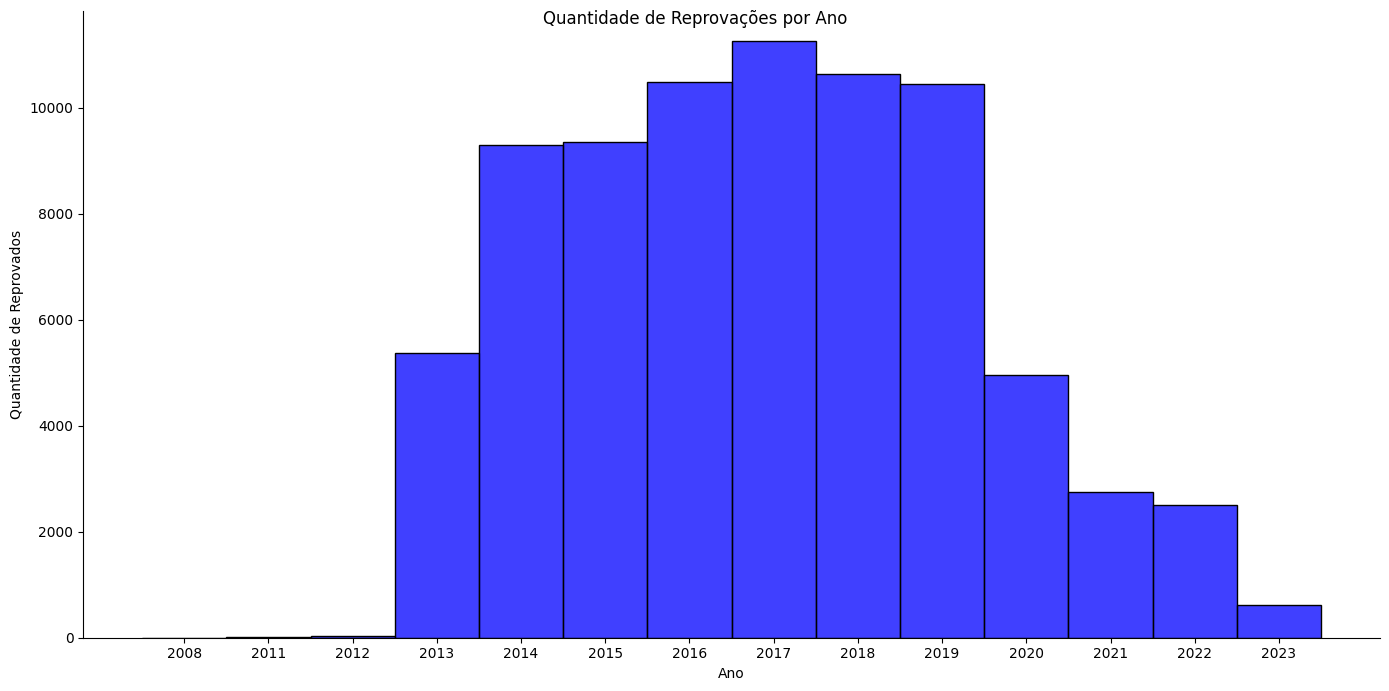

In [ ]:
df_reprovados = df[df['status_x'] == 'REPROVADO' ]
df_reprovados = df_reprovados.sort_values('classYear')
df_reprovados_por_ano = df_reprovados.groupby('classYear').size()
histogram = seaborn.displot(data=df_reprovados, x='classYear', color = 'blue', height=7, aspect=2)
histogram.set_axis_labels('Ano','Quantidade de Reprovados')
histogram.fig.suptitle('Quantidade de Reprovações por Ano')
histogram

### Vamos analisar se os anos em que tiveram mais reprovações coincidem com os anos que possuem a maior quantidade de ingressantes.

*   Com base nas poucas informações que temos sobre os ingressantes disponíveis, observamos que, quando ocorreu um aumento no número de reprovados, houve uma redução na quantidade de ingressantes na universidade. Isso sugere que é altamente improvável que exista uma relação direta entre essas duas variáveis.

In [ ]:
anos = df_reprovados['classYear'].unique()
reprovados = df_reprovados_por_ano.tolist()
ingressantes = df.drop_duplicates(subset='registration').sort_values('admissionYear').groupby('admissionYear').size().tolist()

trace1 = go.Scatter(x = anos, y = reprovados, mode = 'markers+lines', name = 'Reprovados')
trace2 = go.Scatter(x = anos, y = ingressantes, mode = 'markers+lines', name = 'Ingressantes')
data = [trace1, trace2]
py.iplot(data)

### Análise da Taxa de Desistência em Relação ao Gênero e Estado Civil

- Inicialmente, consideraremos desistência como cancelamento por abandono, cancelamento a pedido do aluno e cancelamento devido à reprovação em todas as disciplinas por falta.
- O objetivo desta análise é avaliar o impacto do estado civil na taxa de desistência do curso entre indivíduos de diferentes gêneros. É importante notar que fatores como relações abusivas e machismo ainda influenciam a vida de muitas mulheres, o que pode afetar sua decisão de abandonar o curso.
- Os resultados indicam que a taxa de desistência entre homens casados é superior quando comparada à das mulheres. A mesma situação vale para os homens solteiros.

In [ ]:
labels = ['Masculino', 'Feminino']
df_filtered = df.drop_duplicates(subset='registration')
df_filtered = df_filtered[['maritalStatus','gender','inactivityReason']]
df_filtered = df_filtered[(df_filtered['inactivityReason'] =='CANCELAMENTO_POR_ABANDONO') | (df_filtered['inactivityReason'] == 'CANCELADO_REPROVOU_TODAS_POR_FALTAS') | (df_filtered['inactivityReason'] == 'CANCELAMENTO_P_SOLICITACAO_ALUNO') ]
df_filtered = df_filtered[(df_filtered['maritalStatus'] == 'SOLTEIRO') | (df_filtered['maritalStatus'] == 'CASADO')]
df_filtered = df_filtered.groupby(['gender','maritalStatus','inactivityReason']).size().reset_index(name='count')
df_filtered['total_inactivity_reason'] = df_filtered.groupby(['gender', 'maritalStatus'])['count'].transform('sum')
df_filtered = df_filtered.drop_duplicates(subset='total_inactivity_reason')

value_masculino_casado = df_filtered.loc[(df_filtered['gender'] == 'MASCULINO') & (df_filtered['maritalStatus'] == 'CASADO'), 'total_inactivity_reason'].iloc[0]
value_feminino_casado = df_filtered.loc[(df_filtered['gender'] == 'FEMININO') & (df_filtered['maritalStatus'] == 'CASADO'), 'total_inactivity_reason'].iloc[0]
value_masculino_solteiro =  df_filtered.loc[(df_filtered['gender'] == 'MASCULINO') & (df_filtered['maritalStatus'] == 'SOLTEIRO'), 'total_inactivity_reason'].iloc[0]
value_feminino_solteiro =  df_filtered.loc[(df_filtered['gender'] == 'FEMININO') & (df_filtered['maritalStatus'] == 'SOLTEIRO'), 'total_inactivity_reason'].iloc[0]

desistencia_casados = [value_masculino_casado, value_feminino_casado]
desistencia_solteiros = [value_masculino_solteiro, value_feminino_solteiro]

casados = go.Bar(x = labels,
               y = desistencia_casados,
               name = 'Casado')

solteiros = go.Bar(x = labels,
                y = desistencia_solteiros,
                name = 'Solteiro')

layout = go.Layout(
    title='Quantidade de Desistentes por Sexo e Estado Civil',
    yaxis=dict(title='Quantidade de Desistentes')
)

data = [casados, solteiros]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Inatividade por *Ano*

O Esperado era que a quantidade de alunos inativos a cada ano diminuisse. (Poderia haver algum incentivo à educação ou algo do tipo).

Entretando, é percebido que a quantidade de alunos inativos aumentam a cada ano, pelo menos ao redor do ano de 2013 à 2019. Posteriormente começa a ter uma queda nessa quantidade. Isso é um indicativo de que a expectativa inicial não contempla o fato dos dados.

Outra ideia esperada é que nos anos que envolvessem a pandemia, tivesse uma quantidade maior de pessoas inativas. Mas essa diferença não é percebida.

Text(0.5, 1.0, 'Inatividade por ano')

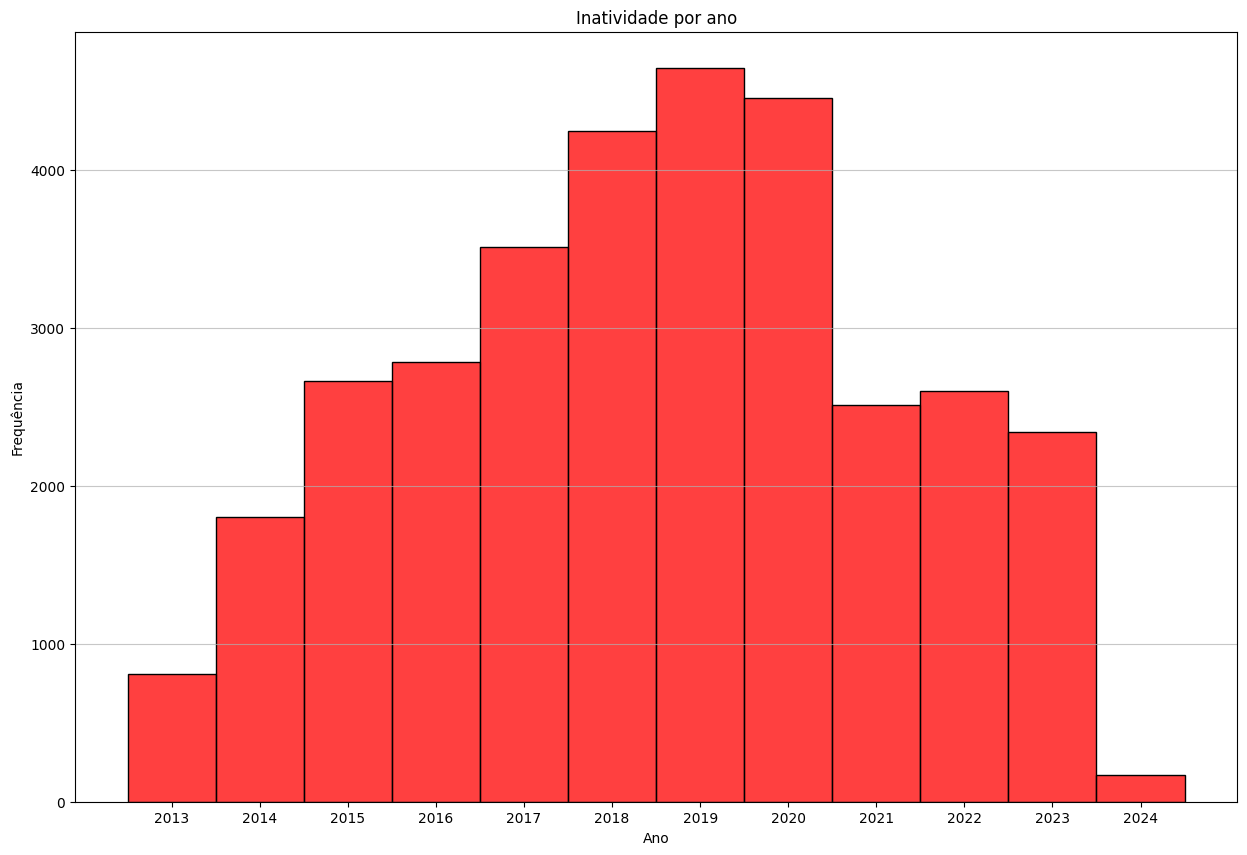

In [ ]:
dfdrop = df.drop_duplicates(subset='registration')

term_counts = dfdrop['inactivityYear'].value_counts().reset_index()
term_counts.columns = ['inactivityYear', 'Count']

term = term_counts.sort_values('inactivityYear')

nbins=len(term['inactivityYear'].unique())

plt.figure(figsize=(15,10))

seaborn.histplot(x=dfdrop.inactivityYear.sort_values(),
             bins=nbins, color = 'red')

plt.grid(axis='y', alpha=0.7)
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.title('Inatividade por ano')

### Top 5 cursos da universidade mais cursados

- É interessante saber os cursos que estão sendo mais procurados atualmente. Entretanto não se sabe ao certo o motivo desses cursos estarem no top 5. Uma possível interpretação é a quantidade de vagas disponiveis periodicamente ser maior para esses cursos.

In [ ]:
term_counts = df.drop_duplicates(subset='registration')

term_counts = term_counts['courseCode'].value_counts().reset_index()
term_counts.columns = ['courseCode', 'Count']

course_mapping = {
    '14123100': 'ENGENHARIA ELÉTRICA',
    '14102100': 'CIÊNCIA DA COMPUTAÇÃO - D',
    '15122100': 'ENGENHARIA CIVIL - D',
    '41410100': 'MEDICINA VETERINÁRIA - D',
    '51204100': 'ENFERMAGEM - D'
}

term_counts['courseCode'] = term_counts['courseCode'].map(course_mapping)

top_5_courses = term_counts.nlargest(5, 'Count')

fig = px.bar(top_5_courses, x='courseCode', y='Count',
             title='Top 5 Cursos com Maior Quantidade de Alunos',
             labels={'courseCode': 'Curso', 'Count': 'Quantidade de Alunos'},
             color='courseCode')

fig.show()


### Top 5 Cursos mais cursados e contagem para cada tipo de razão de inatividade.

- A expectativa para esse tipo de gráfico é que permita uma melhor visualização ao comparar os motivos de inatividade entre os 5 cursos mais cursados na universidade federal.

- Esse gráfico permitiu verificar, entre várias coisas, que ciência da computação, por exemplo, é o curso que possui mais graduados entre os top5. Mostrando, inclusive, que esse é o principal motivo de "inatividade" no curso.

- É possível perceber, também que Engenharia elétrica é o curso, entre os top5, que tem mais pessoas que são "jubiladas" do curso por reprovar 3 vezes na mesma disciplina, além de ser também o curso que os alunos mais recomeçam (ingressam novamente).

In [ ]:
df_rv = df.drop_duplicates(subset='registration')

course_mapping = {
    '14123100': 'ENGENHARIA ELÉTRICA',
    '14102100': 'CIÊNCIA DA COMPUTAÇÃO - D',
    '15122100': 'ENGENHARIA CIVIL - D',
    '41410100': 'MEDICINA VETERINÁRIA - D',
    '51204100': 'ENFERMAGEM - D'
}


filtered_df = df_rv[df_rv['courseCode'].isin(course_mapping.keys())]


filtered_df['courseName'] = filtered_df['courseCode'].map(course_mapping)


counts = filtered_df.groupby(['courseName', 'inactivityReason']).size().reset_index(name='Count')


fig = px.scatter(counts, x='courseName', y='inactivityReason', size='Count',
                 title='Top 5 Cursos mais cursados e Razões de Inatividade',
                 labels={'courseName': 'Curso', 'inactivityReason': 'Razão de Inatividade', 'Count': 'Quantidade'},
                 color='courseName',
                 size_max=60)


fig.show()


### Ingresso de acordo com a escolaridade secundária ao longo dos anos

- A partir dos histogramas sobrepostos abaixo, é possível observar que a quantidade de alunos ingressantes com escolaridade secundária apenas em escola pública se mostra superior em relação à escolaridade secundária apenas em escola privada, o que reflete o comportamento encontrado em outras universidades federais do país, mas pode ser surpreendente ao levar-se em consideração aspectos econômicos e sociais atrelados a essa temática.
- A distribuição dos dados também mostra que a taxa de ingresso dos estudantes da rede pública se mantém estável, com poucas oscilações, enquanto que a taxa de ingresso dos estudantes da rede privada vai decrescendo ao longo dos anos.
- Seria interessante investigar se há fatores externos que podem ter influência sobre esses comportamentos e, se sim, quais seriam eles.

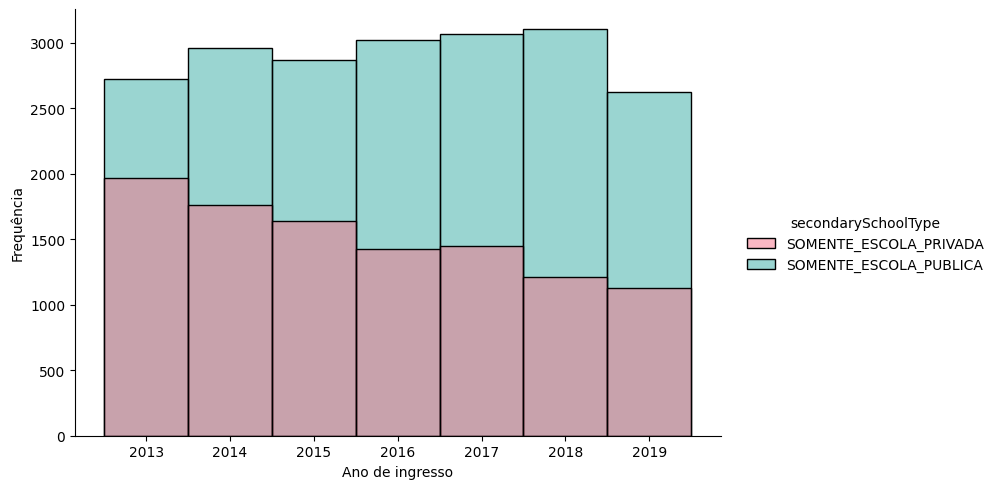

In [ ]:
num_adm_years = df['admissionYear'].nunique()

pub_school_df = df[df['secondarySchoolType'] == 'SOMENTE_ESCOLA_PUBLICA'].drop_duplicates('registration')
priv_school_df = df[df['secondarySchoolType'] == 'SOMENTE_ESCOLA_PRIVADA'].drop_duplicates('registration')

unique_sec_school_df = pd.concat([pub_school_df, priv_school_df], axis=0)

unique_sec_school_df['admissionYear'] = unique_sec_school_df['admissionYear'].astype(int)
unique_sec_school_df = unique_sec_school_df.sort_values(by='admissionYear')

unique_sec_school_df['admissionYear'] = unique_sec_school_df['admissionYear'].astype(str)

g = seaborn.displot(data=unique_sec_school_df, x='admissionYear', hue='secondarySchoolType', height=5, aspect=1.5, bins=num_adm_years, palette="husl")
g.set_axis_labels("Ano de ingresso", "Frequência")

- O gráfico de linhas a seguir apresenta a distribuição dos alunos ingressantes, com cada tipo de escolaridade secundária, ao longo dos anos.
- Para esse tipo de cenário, o fato de ele ser interativo permite uma análise muito mais abragente do que apenas observar o todo (gráfico estático), trazendo a possibilidade de visualizar categorias isoladamente, fazer comparações entre elas e obter dados específicos de qualquer ponto do gráfico.
- Embora a concentração dos dados esteja nos dois tipos de escolaridade alvos do gráfico anterior, os demais tipos também trazem resultados interessantes para uma análise posterior. De antemão, é possível perceber que também há um comportamento decrescente em suas linhas.

In [ ]:
new_df = df.drop_duplicates('registration')[['admissionYear', 'secondarySchoolType']]
new_df['secondarySchoolType'] = new_df['secondarySchoolType'].fillna('NAO_IDENTIFICADO')
new_df['admissionYear'] = new_df['admissionYear'].astype(int)

admission_years = sorted(new_df['admissionYear'].unique())
sec_school_types = new_df['secondarySchoolType'].unique()
traces = []

for school_type in sec_school_types:
  count_school_type = list(new_df[new_df['secondarySchoolType'] == school_type].groupby('admissionYear').size())
  trace = go.Scatter(x = admission_years, y = count_school_type, mode = 'markers+lines', name = school_type.lower())

  traces.append(trace)

py.iplot(traces)

## Gráficos de dispersão, boxplots, violinplots

**As análises podem ser do datset inteiro ou de um recorte deles (e.g., análise para uma determinada região, gênero, etc).**

Plote 2 a 5 gráficos que julgar interessantes.

Procure fazer comparações (colocar 2 ou mais boxplot lado a lado, por exemplo).

Procure usar algumas visualizações um pouco diferentes daquelas vistas em sala. Por exemplo. gráficos que misturam pontos com boxplot ou violinplots. Algumas sugestões estão em um capítulo de livro postado no classroom (do livro Fundamentals of Data Visualization, de Claus O. Wilke).

Procure identificar situações pouco esperadas / menos óbvias, pois, se conseguir, isso será um grande diferencial.

Deixe comentários em markdown nas células que entecedem os gráficos.



### Na qualidade de gestor da universidade, solicito uma análise comparativa das notas obtidas por alunos que receberam sua formação exclusivamente em instituições de ensino particulares em contraste com aqueles que frequentaram exclusivamente escolas públicas, ao longo dos anos.


*   Com o gráfico abaixo, percebemos que nos anos de 2007 até 2010, não há  ingressantes na universidade que estudaram somente em escola pública.
*   No geral, as notas não se diferenciam muitos entre as duas categorias.


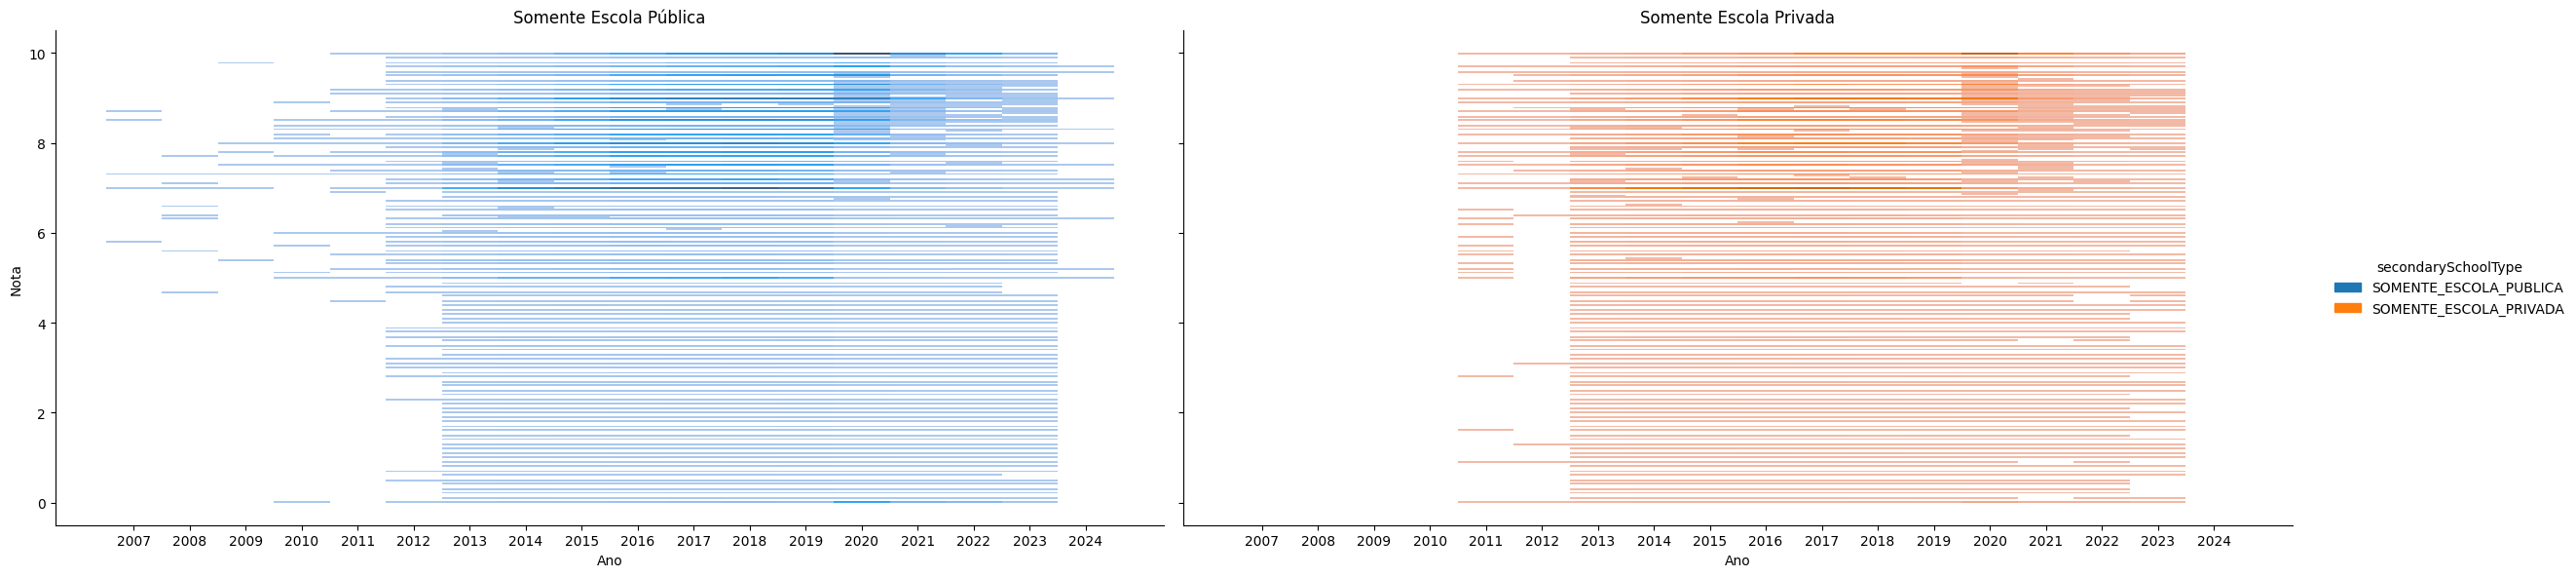

In [ ]:
df_filtered = df[(df['secondarySchoolType'] == 'SOMENTE_ESCOLA_PUBLICA') | (df['secondarySchoolType'] == 'SOMENTE_ESCOLA_PRIVADA')].sort_values('classYear')
df_filtered['classYear'] = df_filtered['classYear']
df_filtered = df_filtered[df_filtered['classYear'] != '2103']

titles = {'SOMENTE_ESCOLA_PUBLICA' :'Somente Escola Pública', 'SOMENTE_ESCOLA_PRIVADA':'Somente Escola Privada' }
g = seaborn.displot(data=df_filtered, x='classYear', y='finalAverage', hue="secondarySchoolType", col='secondarySchoolType', height=6, aspect=2)
g.set_axis_labels("Ano", "Nota")
g.set_titles(template="{col_name}")

for ax in g.axes.flat:
    col_name = ax.get_title().split(' - ')[0]
    if col_name in titles:
        ax.set_title(titles[col_name])

### Boxplots para investigar as notas dos alunos com base na categoria de política afirmativa

Era esperado que a distribuição das notas fossem muito diferentes.

Porém foi visto que existe uma harmonia entre as partes.

<ipython-input-21-8fe5c3101a81>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-8fe5c3101a81>:5: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



<Axes: xlabel='affirmativePolicy', ylabel='finalAverage'>

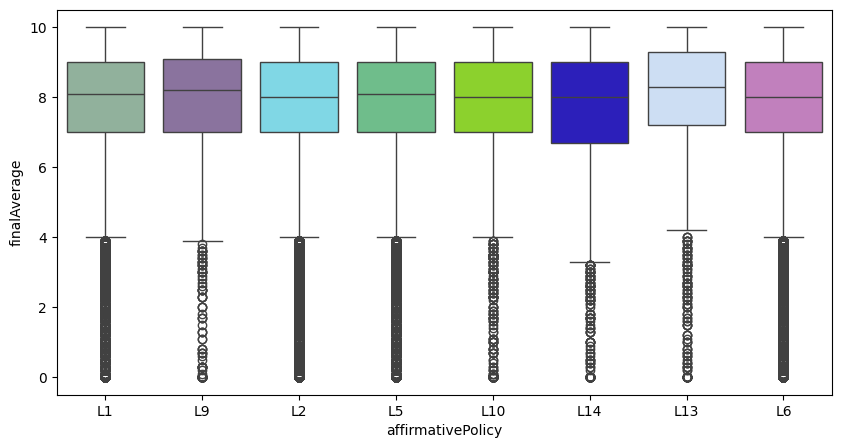

In [ ]:
plt.figure(figsize=(10,5))
np.random.seed(0)
df_temp = df[['affirmativePolicy', 'finalAverage']]
colors = np.random.rand(8, 3)
seaborn.boxplot(x='affirmativePolicy', y='finalAverage',palette=colors, data=df_temp)

Visualização do boxplot de forma iterativa para melhor visualização das notas.

In [ ]:
# Create a list of Box objects, one for each unique value in the 'affirmativePolicy' column
box_data = []
for policy in df_temp['affirmativePolicy'].unique():
    box_data.append(go.Box(
        y=df_temp[df['affirmativePolicy'] == policy]['finalAverage'],
        name=policy
    ))

# Define the layout
layout = go.Layout(
    title='Final Average by Affirmative Policy',
    yaxis=dict(title='Final Average'),
    xaxis=dict(title='Affirmative Policy')
)

# Create the figure and plot it
fig = go.Figure(data=box_data, layout=layout)
iplot(fig)


## Correlações

**As análises podem ser do datset inteiro ou de um recorte deles (e.g., análise para uma determinada região, gênero, etc).**

Procure por correlações nos dados e mostre os valores encontrados. Fique à vontade para plotar gráficos antes de calcular a correlação, caso ache útil.

Justifique a estratégia utilizada para calcular.

Basta mostrar de 2 a 5 situações investigadas.

Lembre-se de comentar seus achados. Por exemplo:

*   Se a correlação encontrada foi relevante (se não é muito óbvia).
*   Ou se você esperaria ver uma correlação entre duas variáveis mas os dados não confirmaram. Ou seja, alguns dos itens que você vai adicionar ao notebook pode não ser uma correlação que encontrou, mas sim a confirmação de uma ausência de correlação.


Deixe comentários em markdown nas células que entecedem os códigos / gráficos.



### Correlação entre variável raça e política afirmativa

- O método utilizado para o cálculo de correlação foi o de Spearman.
- Era esperado que houvesse uma boa correlação entre as duas variáveis, pois geralmente as politicas afirmativas levam em consideração a raça dos alunos.
- No entanto, a correlação entre as duas deu negativa e muito baixa.

In [ ]:
from sklearn.preprocessing import LabelEncoder

dfdrop = df.drop_duplicates(subset='registration')
df_ra = dfdrop[['race', 'affirmativePolicy']]

label_encoder_col1 = LabelEncoder()
label_encoder_col2 = LabelEncoder()

df_ra['race_encoded'] = label_encoder_col1.fit_transform(df_ra['race'])
df_ra['affirmativePolicy_encoded'] = label_encoder_col2.fit_transform(df_ra['affirmativePolicy'])

df_ra[['race_encoded','affirmativePolicy_encoded']].corr(method='spearman')

,race_encoded,affirmativePolicy_encoded
race_encoded,1.000000,-0.223172
affirmativePolicy_encoded,-0.223172,1.000000


### Correlação entre status nas disciplinas e nacionalidade

- A partir do coeficiente de correlação obtido utilizando o método de Spearman, é possível concluir que as variáveis apresentam uma correlação praticamente nula, ou seja, não é significativa.
- Era esperado que a nacionalidade poderia ter alguma influência sobre o status dos alunos nas disciplinas, mas isso não foi confirmado.

In [ ]:
df_vars = df[['nationality', 'status_x']]

label_encoder_col1 = LabelEncoder()
label_encoder_col2 = LabelEncoder()

df_vars['nationality'] = label_encoder_col1.fit_transform(df_vars['nationality'])
df_vars['status_x'] = label_encoder_col2.fit_transform(df_vars['status_x'])

df_vars[['nationality','status_x']].corr(method='spearman')

,nationality,status_x
nationality,1.000000,-0.005069
status_x,-0.005069,1.000000


# Implementações EXTRAS / RASCUNHO

Caso tenha implementado mais coisas do que foi pedido, coloque-as a partir deste ponto, para deixar a parte anterior mais limpa.

Fique totalmente à vontade para colocar qualquer coisa aqui, com ou sem comentários. É como o rascunho de uma prova... não será corrigido.

In [ ]:
#